In [1]:
import torch
import fit.sine as T
import numpy as np

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_printoptions(precision=4, linewidth=500, sci_mode=True)

Test fitting an exponentially damped noisy sine wave with a second order ODE

In [2]:
T.train()

/nfs/scistore19/alistgrp/jiachen/miniconda3/envs/lpode/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/scistore19/alistgrp/jiachen/miniconda3/envs/lpo ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/nfs/scistore19/alistgrp/jiachen/miniconda3/envs/lpode/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `ten

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=500` reached.


In [3]:
end = T.method.model.end
n_step = T.method.model.n_step
_y = np.linspace(0, end, n_step)

In [4]:
func_list = T.method.func_list
y_list = T.method.y_list
n_iter =500

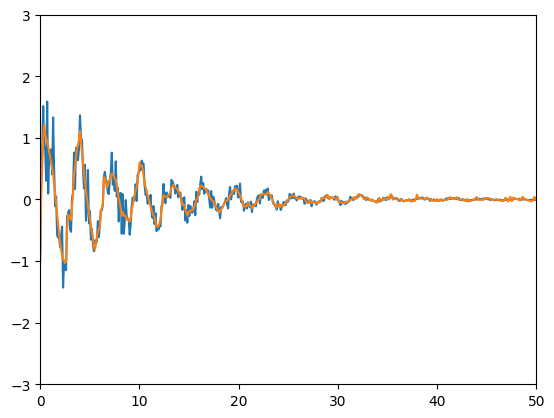

In [6]:

fig, ax = plt.subplots(1,1)
ax.set_xlim((0,end))
ax.set_ylim((-3,3))

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animate(t):
    line1.set_data(_y,y_list[2*t])
    line2.set_data(_y,func_list[2*t])
    return line1,
anim = FuncAnimation(fig, animate, frames=250, interval=20, blit=True)

HTML(anim.to_html5_video())